In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('embeddings/cluster_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
with open('embeddings/cluster_label_v3.pkl', 'rb') as f:
    label = pickle.load(f)

In [11]:
data = np.array(data)

label = np.array(label)

data.shape, label.shape
np.unique(label, return_counts=True)

(array(['abnorm', 'norm'], dtype='<U6'), array([50, 50]))

In [12]:
tsne = TSNE(n_components=2, perplexity = 40, verbose=1, random_state=123)
z = tsne.fit_transform(data) 

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 4.183620
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.897121
[t-SNE] KL divergence after 800 iterations: 0.102034


In [14]:
df = pd.DataFrame()
df["y"] = label
#df["y"] = df["y"].apply(lambda x:sleep_stage[x])
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

[Text(0.5, 1.0, 'T-SNE projection')]

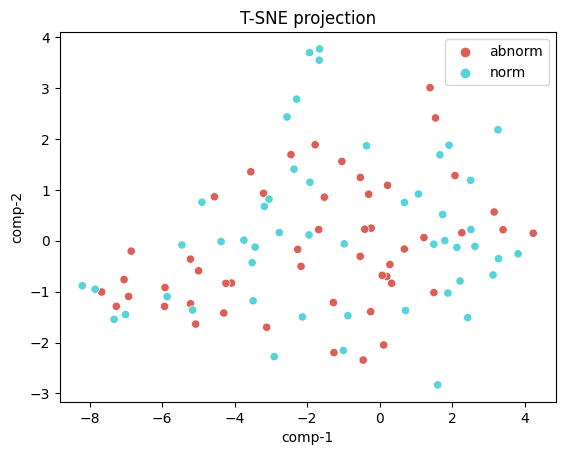

In [15]:
fig = plt.gcf()
#fig.set_size_inches(50, 50)
sns.scatterplot(x="comp-1", y="comp-2" , hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

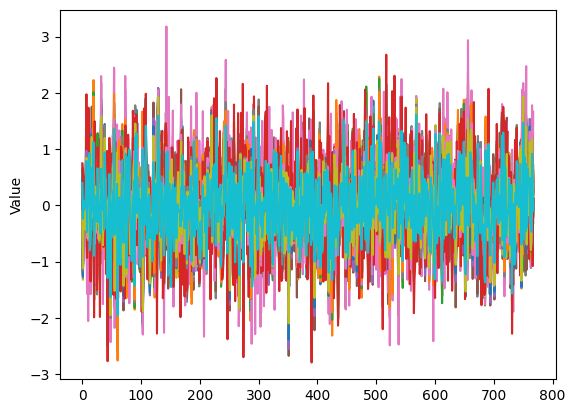

In [16]:
tmp = data.T
for i in range(tmp.shape[1]):
    plt.plot(tmp[:, i], label=f'Variable {i+1}')

plt.ylabel('Value')
#plt.legend()  # Add a legend

# Display the plot
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['comp-1', 'comp-2'])

In [19]:
principalDf['y'] = ' label'

[Text(0.5, 1.0, 'PCA projection')]

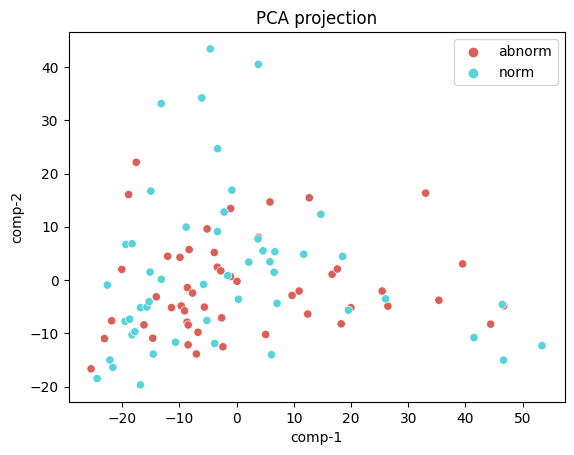

In [20]:
fig = plt.gcf()
#fig.set_size_inches(50, 50)
sns.scatterplot(x="comp-1", y="comp-2" , hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=principalDf).set(title="PCA projection") 